In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from spec_id import Analyze_Stack_avgage_cont_feat, Likelihood_contours,Stack_spec_normwmean,Stack_model_normwmean,Make_model_list,Scale_model, \
    Analyze_Stack_avgage,Highest_likelihood_model,Analyze_Stack_avgage_single_gal_combine
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d,interp2d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap1 = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)
colmap2 = sea.cubehelix_palette(12, start=2, rot=.5, dark=0, light=1.2, as_cmap=True)

In [22]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('masslist_mar22.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

IDc=[]  # compact sample
IDd=[]  # diffuse sample

IDmL=[]  # low mass sample
IDmH=[]  # high mass sample

IDlz=[]  # z < 1.13
IDmz=[]  # 1.13 < z < 1.3
IDhz=[]  # 1.3 < z

ID_0=[]  # 1.0 < z < 1.1
ID_1=[]  # 1.1 < z < 1.2
ID_2=[]  # 1.2 < z < 1.3
ID_3=[]  # 1.3 < z < 1.4
ID_6=[]  # 1.6 < z < 1.7



for i in range(len(ids)):
    if 0.11 < comp[i]:
        IDd.append(i)
    if 0.11 > comp[i]:
        IDc.append(i)
    if 10.931 > lmass[i]:
        IDmL.append(i)
    if 10.931 < lmass[i]:
        IDmH.append(i)
    if rshift[i] < 1.13 and ids[i] != 'n21427' and ids[i] != 'n39805' and ids[i] != 'n48631':
        IDlz.append(i)
    if 1.13 < rshift[i] < 1.3 and ids[i] != 'n21427' and ids[i] != 'n39805' and ids[i] != 'n48631':
        IDmz.append(i)
    if 1.3 < rshift[i] and ids[i] != 'n21427' and ids[i] != 'n39805' and ids[i] != 'n48631':
        IDhz.append(i)
    if 1.0 < rshift[i] < 1.1:
        ID_0.append(i)
    if 1.1 < rshift[i] < 1.2 and ids[i] != 'n21427' and ids[i] != 'n39805' and ids[i] != 'n48631':
        ID_1.append(i)
    if 1.2 < rshift[i] < 1.3 and ids[i] != 'n21427' and ids[i] != 'n39805' and ids[i] != 'n48631':
        ID_2.append(i)
    if 1.3 < rshift[i] < 1.4:
        ID_3.append(i)
    if 1.6 < rshift[i] < 1.7:
        ID_6.append(i)
        
        
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

print len(IDc)
print len(IDd)

print len(IDmH)
print len(IDmL)

10
15
6
19


In [3]:
gids,glmass,gcomp,gbmetal,gbage=np.array(Readfile('galaxy_measurments_apr11.dat',is_float=False))
glmass,gcomp,gbmetal,gbage=np.array([glmass,gcomp,gbmetal,gbage]).astype(float)

IDgA=[]

IDgc=[]  # low mtor sample
IDgd=[]  # high mtor sample

IDmgL=[]  # low mass sample
IDmgH=[]  # high mass sample

for i in range(len(gids)):
    if 0.11 < gcomp[i] and gids[i] in ids:
        IDgd.append(i)
    if 0.11 > gcomp[i] and gids[i] in ids:
        IDgc.append(i)
    if 10.931 > glmass[i] and gids[i] in ids:
        IDmgL.append(i)
    if 10.931 < glmass[i] and gids[i] in ids:
        IDmgH.append(i)
        
print len(IDgc)
print len(IDgd)

print len(IDmgH)
print len(IDmgL)

10
15
6
19


In [ ]:
points=['o','o','o','o','o','o','d','d','d','d','d','d','s','s','s','s','s','s','D']

c_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[IDc]]
c_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[IDc]]

d_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[IDd]]
d_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[IDd]]

mh_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[IDmH]]
mh_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[IDmH]]

ml_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[IDmL]]
ml_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[IDmL]]

In [ ]:
def Plot_combined_LH(cont_list,feat_list,speclist,rshift,tau,metal,age,gal_metal,gal_age,save_plot=False,plot_name='',stack_scale=False):
    Pr,bfac,bfmc=Analyze_Stack_avgage_single_gal_combine(cont_list,feat_list,speclist,rshift,tau,metal,age,stack_scale=stack_scale)
    
    a=[np.trapz(U,metal) for U in Pr]
    m=np.array([np.trapz(U,age) for U in Pr.T])/0.019
    gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4])
    
    onesig,twosig=Likelihood_contours(age,metal,Pr)
    levels=np.array([twosig,onesig])
    
    plt.figure(figsize=[8,8])
    gs.update(wspace=0.0,hspace=0.0)
    ax=plt.subplot(gs[1,0]) 
    plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
    plt.contourf(M,A,Pr,40,cmap=colmap1)
    plt.plot(bfmc,bfac,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfac,np.round(bfmc/0.019,2)))
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.plot(gal_metal,gal_age,'ro')
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)')
    plt.ylabel('Age (Gyrs)')
    plt.legend(loc=4)

    plt.subplot(gs[1,1])
    plt.plot(a,age)
    plt.ylim(min(age),max(age))
    plt.yticks([])
    plt.xticks([])
    #
    plt.subplot(gs[0,0])
    plt.plot(metal,m)
    plt.xlim(min(metal),max(metal))
    plt.yticks([])
    plt.xticks([])
    plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
    if save_plot == True:
        plt.savefig(plot_name)
        plt.close()
    else:
        plt.show()
        plt.close()

def Plot_combined_LH_wstack(cont_list,feat_list,stack_cont,stack_feat,speclist,rshift,tau,metal,age,gal_metal,gal_age,save_plot=False,plot_name='',stack_scale=False):
    Prc,bfac,bfmc=Analyze_Stack_avgage_single_gal_combine(cont_list,feat_list,speclist,rshift,tau,metal,age,stack_scale=stack_scale)

    ac=[np.trapz(U,metal) for U in Prc]
    mc=np.array([np.trapz(U,age) for U in Prc.T])/0.019

    onesig,twosig=Likelihood_contours(age,metal,Prc)
    levelc=np.array([twosig,onesig])

    Prs, bfas, bfms= Analyze_Stack_avgage_cont_feat(stack_cont,stack_feat,tau,metal,age)

    ags=[np.trapz(U,metal) for U in Prs]
    ms=np.array([np.trapz(U,age) for U in Prs.T])/0.019

    onesig,twosig=Likelihood_contours(age,metal,Prs)
    levels=np.array([twosig,onesig])

    gs=gridspec.GridSpec(2,2,width_ratios=[3,1],height_ratios=[1,4],wspace=0.0,hspace=0.0)

    plt.figure(figsize=[8,8])
    plt.subplot(gs[1,0])
    plt.contour(M,A,Prc,levelc,colors='k',alpha=.5,linewidths=2)
    plt.contourf(M,A,Prc,40,cmap=colmap1)
    plt.contour(M,A,Prs,levels,colors='k',linewidths=2)
    plt.contourf(M,A,Prs,40,cmap=colmap2,alpha=.3)
    plt.plot(bfmc,bfac,'p',color='#13d6ff',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfac,np.round(bfmc/0.019,2)))
    plt.plot(bfms,bfas,'p',color='#6c1de8',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfas,np.round(bfms/0.019,2)))
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.plot(gal_metal,gal_age,'ro')
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)')
    plt.ylabel('Age (Gyrs)')
    plt.legend(loc=3)

    plt.subplot(gs[1,1])
    plt.plot(ac,age,color='#13d6ff')
    plt.plot(ags,age,color='#6c1de8')
    plt.ylim(min(age),max(age))
    plt.yticks([])
    plt.xticks([])
    #
    plt.subplot(gs[0,0])
    plt.plot(metal,mc,color='#13d6ff')
    plt.plot(metal,ms,color='#6c1de8')
    plt.xlim(min(metal),max(metal))
    plt.yticks([])
    plt.xticks([])
    plt.gcf().subplots_adjust(bottom=0.165,left=0.12)
    if save_plot == True:
        plt.savefig(plot_name)
        plt.close()
    else:
        plt.show()
        plt.close()

In [10]:
%matplotlib inline
Plot_combined_LH_wstack(c_cont_list,c_feat_list,'chidat/com_cont_mar28_fit_chidata.fits','chidat/com_feat_mar28_fit_chidata.fits',
                        speclist[IDc],rshift[IDc],np.array(tau),metal,age,gbmetal[IDc],gbage[IDc],
                        save_plot=True,plot_name='../important_plots/com_all_LH_apr10.png',stack_scale=False)

Plot_combined_LH_wstack(d_cont_list,d_feat_list,'chidat/ext_cont_mar28_fit_chidata.fits','chidat/ext_feat_mar28_fit_chidata.fits',
                        speclist[IDd],rshift[IDd],np.array(tau),metal,age,gbmetal[IDd],gbage[IDd],
                        save_plot=True,plot_name='../important_plots/ext_all_LH_apr10.png',stack_scale=False)

Plot_combined_LH_wstack(mh_cont_list,mh_feat_list,'chidat/gt10.93_cont_mar28_fit_chidata.fits','chidat/gt10.93_feat_mar28_fit_chidata.fits',
                        speclist[IDmH],rshift[IDmH],np.array(tau),metal,age,gbmetal[IDmH],gbage[IDmH],
                        save_plot=True,plot_name='../important_plots/gt10.93_all_LH_apr10.png',stack_scale=False)

Plot_combined_LH_wstack(ml_cont_list,ml_feat_list,'chidat/lt10.93_cont_mar28_fit_chidata.fits','chidat/lt10.93_feat_mar28_fit_chidata.fits',
                        speclist[IDmL],rshift[IDmL],np.array(tau),metal,age,gbmetal[IDmL],gbage[IDmL],
                        save_plot=True,plot_name='../important_plots/lt10.93_all_LH_apr10.png',stack_scale=False)

Best fit model is 3.4 Gyr and 0.014 Z
Best fit model is 3.3 Gyr and 0.014 Z


Best fit model is 2.5 Gyr and 0.013 Z


Best fit model is 2.3 Gyr and 0.016 Z


Best fit model is 3.3 Gyr and 0.016 Z


Best fit model is 3.1 Gyr and 0.012 Z


Best fit model is 3.4 Gyr and 0.011 Z


Best fit model is 3.5 Gyr and 0.012 Z

In [ ]:
points=['o','o','o','o','o','o','d','d','d','d','d','d','s','s','s','s','s','s','D']

l_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[IDlz]]
l_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[IDlz]]

m_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[IDmz]]
m_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[IDmz]]

h_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[IDhz]]
h_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[IDhz]]

Best fit model is 4.8 Gyr and 0.013 Z


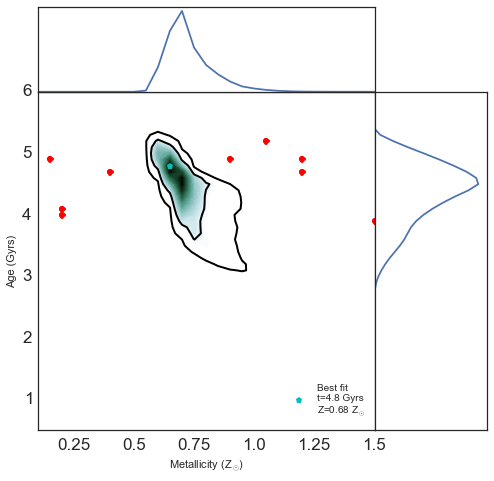

Best fit model is 2.2 Gyr and 0.015 Z


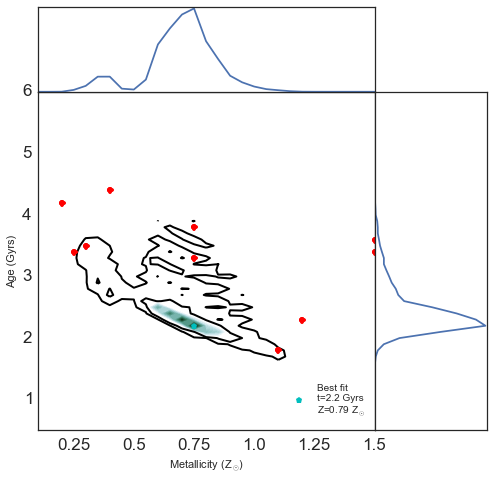

Best fit model is 3.5 Gyr and 0.015 Z


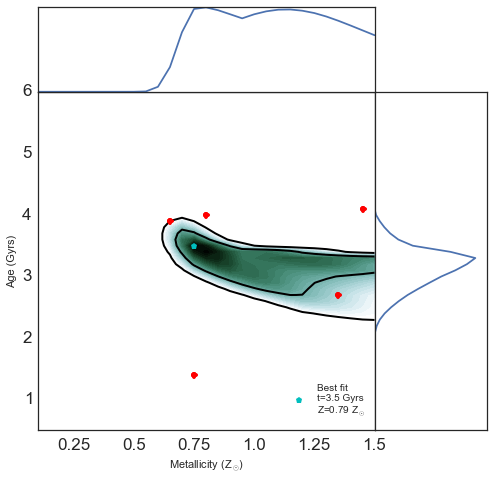

In [16]:
%matplotlib inline
Plot_combined_LH(l_cont_list,l_feat_list,speclist[IDlz],rshift[IDlz],np.array(tau),metal,age,gbmetal[IDlz],gbage[IDlz],
                        save_plot=False,plot_name='../important_plots/lz_all_LH_apr10.png',stack_scale=False)
Plot_combined_LH(m_cont_list,m_feat_list,speclist[IDmz],rshift[IDmz],np.array(tau),metal,age,gbmetal[IDmz],gbage[IDmz],
                        save_plot=False,plot_name='../important_plots/mz_all_LH_apr10.png',stack_scale=False)
Plot_combined_LH(h_cont_list,h_feat_list,speclist[IDhz],rshift[IDhz],np.array(tau),metal,age,gbmetal[IDhz],gbage[IDhz],
                        save_plot=False,plot_name='../important_plots/hz_all_LH_apr10.png',stack_scale=False)

In [ ]:
points=['o','o','o','o','o','o','d','d','d','d','d','d','s','s','s','s','s','s','D']

o0_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[ID_0]]
o0_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[ID_0]]

o1_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[ID_1]]
o1_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[ID_1]]

o2_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[ID_2]]
o2_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[ID_2]]

o3_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[ID_3]]
o3_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[ID_3]]

o6_cont_list=['chidat/%s_apr6_galfit_cont_chidata.fits' % U for U in ids[ID_6]]
o6_feat_list=['chidat/%s_apr6_galfit_feat_chidata.fits' % U for U in ids[ID_6]]

Best fit model is 4.7 Gyr and 0.014 Z


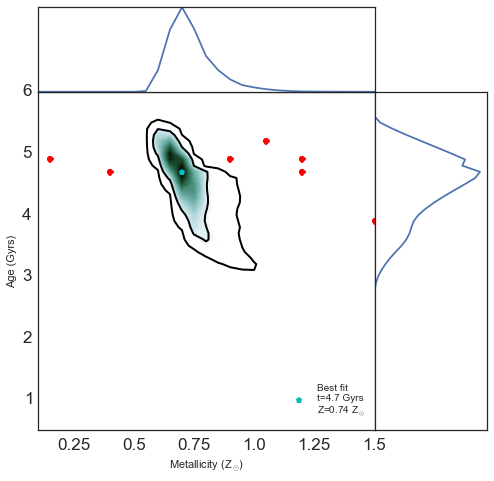

Best fit model is 2.1 Gyr and 0.015 Z


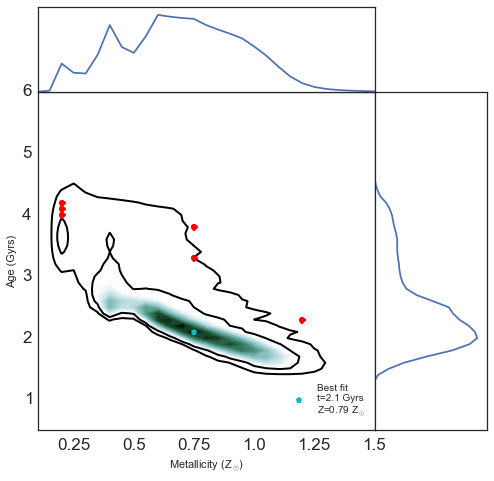

Best fit model is 3.0 Gyr and 0.007 Z


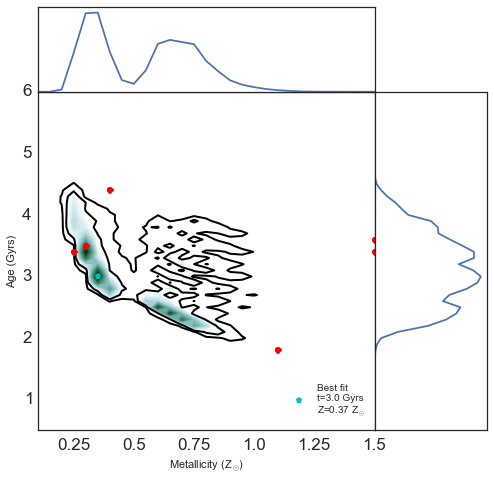

Best fit model is 4.1 Gyr and 0.015 Z


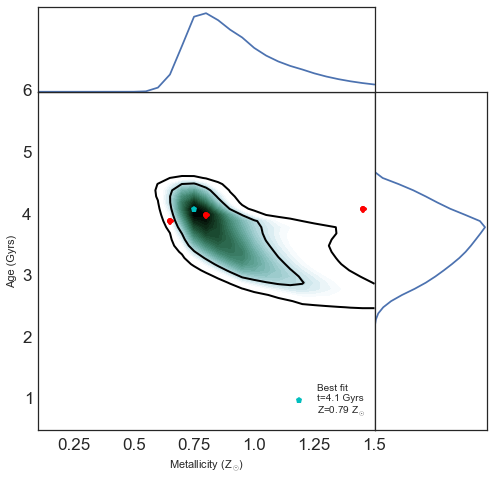

Best fit model is 1.4 Gyr and 0.016 Z


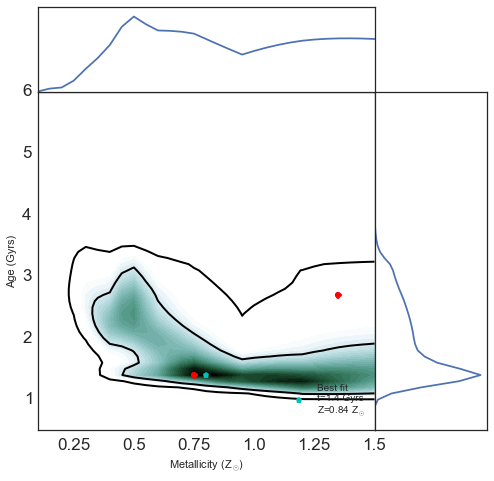

In [24]:
%matplotlib inline
Plot_combined_LH(o0_cont_list,o0_feat_list,speclist[ID_0],rshift[ID_0],np.array(tau),metal,age,gbmetal[ID_0],gbage[ID_0],
                        save_plot=False,plot_name='../important_plots/lz_all_LH_apr10.png',stack_scale=False)
Plot_combined_LH(o1_cont_list,o1_feat_list,speclist[ID_1],rshift[ID_1],np.array(tau),metal,age,gbmetal[ID_1],gbage[ID_1],
                        save_plot=False,plot_name='../important_plots/lz_all_LH_apr10.png',stack_scale=False)
Plot_combined_LH(o2_cont_list,o2_feat_list,speclist[ID_2],rshift[ID_2],np.array(tau),metal,age,gbmetal[ID_2],gbage[ID_2],
                        save_plot=False,plot_name='../important_plots/lz_all_LH_apr10.png',stack_scale=False)
Plot_combined_LH(o3_cont_list,o3_feat_list,speclist[ID_3],rshift[ID_3],np.array(tau),metal,age,gbmetal[ID_3],gbage[ID_3],
                        save_plot=False,plot_name='../important_plots/lz_all_LH_apr10.png',stack_scale=False)
Plot_combined_LH(o6_cont_list,o6_feat_list,speclist[ID_6],rshift[ID_6],np.array(tau),metal,age,gbmetal[ID_6],gbage[ID_6],
                        save_plot=False,plot_name='../important_plots/lz_all_LH_apr10.png',stack_scale=False)